This code is written to plot the behaviour of the forward model used in most parts of the paper. 

In [2]:
import numpy as np
import cte
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from ProcessFunctions import FindMw_v2,Gut

In [3]:
# loading the data from /central/groups/astuart/hkaveh/Data/LearnROM/transfer directory
data=np.load('/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation_Tf600Nt=5.npz')

In [4]:
data.files

['z_ox',
 'x_ox',
 't_ox',
 'V_ox',
 'theta_ox',
 'stress',
 'pot_ot',
 'vmax_ot',
 't_ot']

In [5]:
V_thresh=5e-8
T_filter=100
mu=cte.G

600.0

In [5]:
x_ox=data['x_ox']
z_ox=data['z_ox']
t_ox=data['t_ox']
v_ox=data['V_ox']
theta_ox=data['theta_ox']
stress_ox=data['stress']
pot_ot=data['pot_ot']
vmax_ot=data['vmax_ot']
t_ot=data['t_ot']

In [ ]:
print(t_ox.shape)
print(t_ox[-1,:])
print(t_ox[-1,-1])

In [6]:
start_time=280    # for plotting the slip rate
end_time=340   # for plotting the slip rate


/central/groups/astuart/hkaveh/soft/miniconda3/envs/learnmodel/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


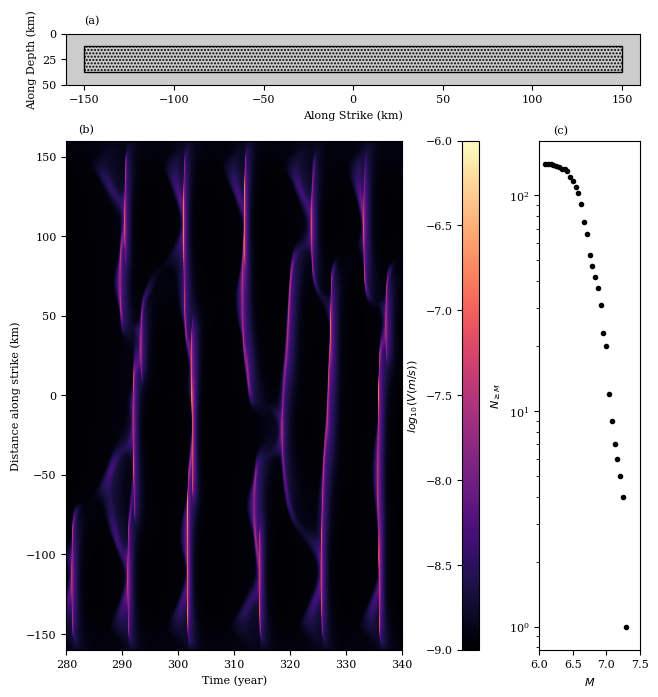

In [30]:
# The first two should be super easy. It is just copying

Nx=256
Nw=32
W=cte.W
L=cte.L_asp+cte.L_buffer    
cmap="magma"
# Define a serif font and set its size
serif_font = fm.FontProperties(family="serif", size=8)

# Create a sample figure
fig = plt.figure(figsize=(7.4, 8))

# Use serif font and set font size for all text in the figure
plt.rc('font', family='serif')
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 8})
gs = gridspec.GridSpec(nrows=2, ncols=2 ,height_ratios=[0.1, 1],width_ratios=[1,0.05])
axes1 = fig.add_subplot(gs[0, :])  # for the geomtery
axes2 = fig.add_subplot(gs[1,0])  # Max slip rate on the fault
# axes3 = fig.add_subplot(gs[1, 2])  # Magnitude frequency distribution
cax2 = fig.add_subplot(gs[1,1])  # colorbar for slip rate
x = np.linspace(-L/2, L/2, Nx, dtype=float)
z = np.linspace(0, W, Nw, dtype=float)
X, Z = np.meshgrid(x, z)
axes1.set_xlim(-L/2*1e-3,L/2*1e-3)
axes1.set_xlabel("Along Strike (km)",fontproperties=serif_font)
axes1.set_ylabel("Along Depth (km)",fontproperties=serif_font)
axes1.invert_yaxis()
rect = lambda color: plt.Rectangle((0,0),.5,.5, color=color)
axes1.set_ylim(bottom=50,top=0)
axes1.text(-150,-10,'(a)')
left_bottom = (-150, 37.5)
width = 300
height = -25
# Create a rectangle patch without fill
rectangle = patches.Rectangle(left_bottom, width, height, fill=False, hatch='.....', edgecolor='black')
# Add the rectangle patch to the plot
axes1.add_patch(rectangle)
left_bottom = (-160, 50)
width = 320
height = -50
rectangle = patches.Rectangle(left_bottom, width, height,facecolor='black',alpha=.2)
axes1.add_patch(rectangle)

#axes2
V_thresh_min=1e-9
V_thresh_max=1e-6   
x_ox=np.linspace(-L/2,L/2,Nx)
V_dip_max=np.max(v_ox,axis=1).T   # Maximum Velocity along the dip
Nt=t_ox.shape[0]
x_ox_t=np.vstack([x_ox]*Nt).T 
time=np.max(t_ox,axis=1).T
PrettyTime=np.reshape(time.T,-1)
Prettyx=np.reshape(x_ox_t.T,-1)
PrettyV=np.reshape(V_dip_max.T,-1)

pl=axes2.scatter(PrettyTime/cte.t_yr,Prettyx*1e-3,marker=".",c=np.log10(PrettyV),cmap=cmap,linewidths=1,vmin=np.log10(V_thresh_min),vmax=np.log10(V_thresh_max))  
axes2.set_xlabel(r'Time (year)',fontproperties=serif_font)
axes2.set_ylabel(r'Distance along strike (km)',fontproperties=serif_font)
axes2.set_xlim(left=start_time,right=end_time)
b=fig.colorbar(pl,cax=cax2)
b.set_label(label=r'$log_{10}(V(m/s))$',fontproperties=serif_font)
axes2.set_ylim(bottom=-L/2/1000,top=L/2/1000)
# b.ax.yaxis.set_label_position('left')  # Move label to the left
# b.ax.yaxis.tick_left()  # Move ticks to the left

#axes3
Mw,_,_=FindMw_v2(pot_ot,vmax_ot,t_ot,cte.t_yr,T_filter,V_thresh,mu)
Mags,Numbs=Gut(Mw)
# axes3.set_xlim(left=6,right=7.5)
# axes3.set_yscale("log")
# axes3.plot(Mags , Numbs,'.',color='black') 
# axes3.set_xlabel(r'$M$')
# axes3.set_ylabel(r'$N_{\geq M}$')   
# axes2.text(start_time+2,165,'(b)')
# axes3.text(6.2,193,'(c)')
plt.tight_layout()
fig.savefig("/central/groups/astuart/hkaveh/Figs/ROM/Geom_Forward_Magfreq+.png",dpi=300, bbox_inches='tight')


In [ ]:
# saving the Mags,Numbs, and the total number of years which is (t_ox[-1,0]/t_yr-T_filter)

In [ ]:
# define a ax and plot the MFD
fig, ax = plt.subplots(figsize=(3, 2))  # This gives you both Figure and Axes
ax.set_xlim(left=6, right=7.5)
ax.set_yscale("log")
ax.plot(Mags, Numbs, '.', color='black')
ax.set_xlabel(r'$M$', fontproperties=serif_font)
ax.set_ylabel(r'$N_{\geq M}$', fontproperties=serif_font)


In [ ]:
total_years = t_ox[-1,0,0]/cte.t_yr- T_filter
print("Total years: ", total_years)
save_dir='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MFDMainSimulation_Tf600Nt=5.npz'
np.savez(save_dir, Mags=Mags, Numbs=Numbs, TotalYears=total_years)
